<a href="https://colab.research.google.com/github/priyankajuttu/FUTURE_ML_01/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip archive.zip


Archive:  archive.zip
  inflating: Sample - Superstore.csv  


In [5]:
import pandas as pd

df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
print(df.head())
print(df.info())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
print(df.columns)
print(df.isnull().sum())
print(df.head())


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/20

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].head())


0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]


In [9]:
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [10]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.day_name()
print(df[['Order Date', 'Year', 'Month', 'Day', 'Weekday']].head())


  Order Date  Year  Month  Day  Weekday
0 2016-11-08  2016     11    8  Tuesday
1 2016-11-08  2016     11    8  Tuesday
2 2016-06-12  2016      6   12   Sunday
3 2015-10-11  2015     10   11   Sunday
4 2015-10-11  2015     10   11   Sunday


In [11]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Day', 'Weekday'],
      dtype='object')


In [12]:
# Replace 'Sales' with your actual sales amount column name
monthly_sales = df.groupby([df['Order Date'].dt.to_period('M')])['Sales'].sum()
print(monthly_sales.head())


Order Date
2014-01    14236.895
2014-02     4519.892
2014-03    55691.009
2014-04    28295.345
2014-05    23648.287
Freq: M, Name: Sales, dtype: float64


In [13]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.day_name()

print(df[['Order Date', 'Year', 'Month', 'Day', 'Weekday']].head())


  Order Date  Year  Month  Day  Weekday
0 2016-11-08  2016     11    8  Tuesday
1 2016-11-08  2016     11    8  Tuesday
2 2016-06-12  2016      6   12   Sunday
3 2015-10-11  2015     10   11   Sunday
4 2015-10-11  2015     10   11   Sunday


In [14]:
# Aggregate monthly sales
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M')).agg({'Sales': 'sum'})
monthly_sales = monthly_sales.reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

print(monthly_sales.head())


  Order Date      Sales
0 2014-01-01  14236.895
1 2014-02-01   4519.892
2 2014-03-01  55691.009
3 2014-04-01  28295.345
4 2014-05-01  23648.287


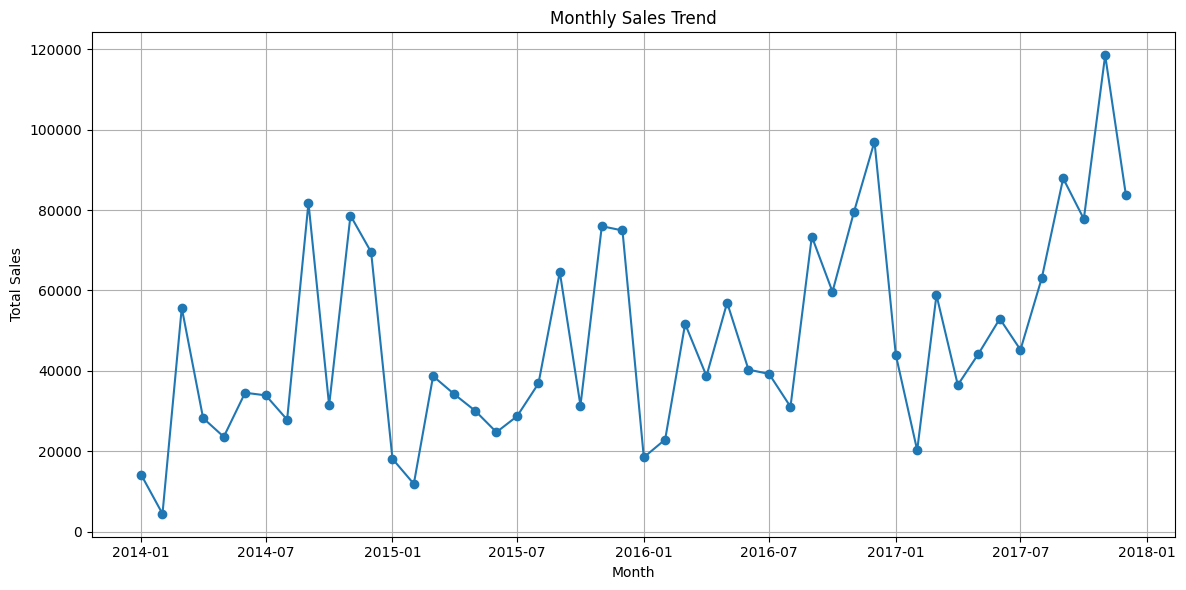

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
!pip install prophet


In [18]:
df_prophet = monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
print(df_prophet.head())


          ds          y
0 2014-01-01  14236.895
1 2014-02-01   4519.892
2 2014-03-01  55691.009
3 2014-04-01  28295.345
4 2014-05-01  23648.287


In [20]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)  # Ensure df_prophet is already defined as shown earlier


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnen30tmw/hj6syxhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnen30tmw/4_i4738n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50175', 'data', 'file=/tmp/tmpnen30tmw/hj6syxhg.json', 'init=/tmp/tmpnen30tmw/4_i4738n.json', 'output', 'file=/tmp/tmpnen30tmw/prophet_modelhcscpt9a/prophet_model-20251024204110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:41:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:41:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


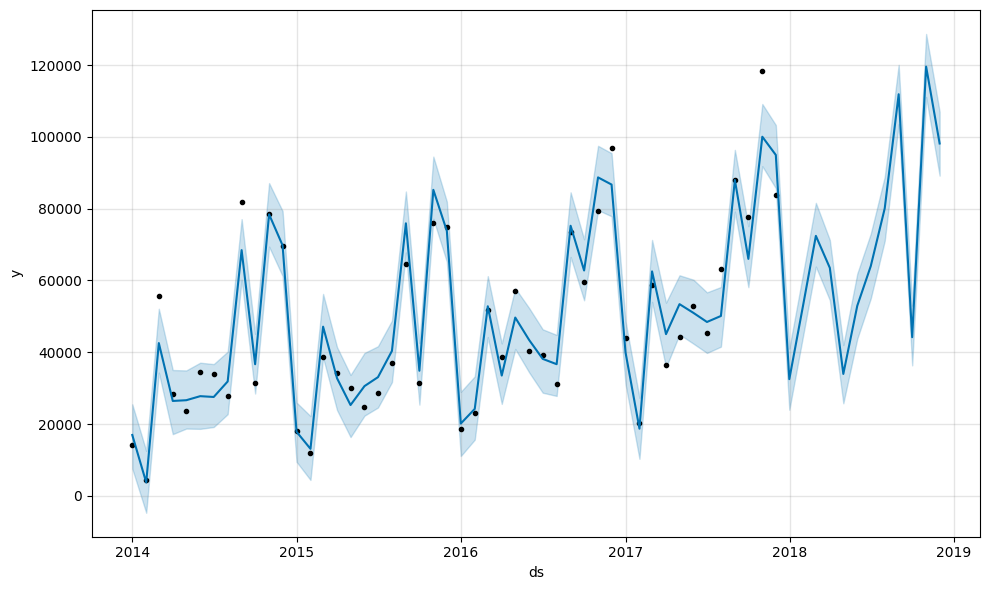

In [22]:
fig = model.plot(forecast)


In [23]:
# Show last 12 months (which are the forecasted months)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


           ds           yhat     yhat_lower     yhat_upper
48 2017-12-31   32512.761784   23979.736034   41055.519224
49 2018-01-31   53334.163026   44857.194805   62187.493232
50 2018-02-28   72434.094412   63864.764371   81627.505404
51 2018-03-31   63522.695609   54514.188133   71295.237861
52 2018-04-30   33971.971296   25782.068172   42012.640985
53 2018-05-31   52957.195141   43759.656474   61920.087079
54 2018-06-30   64014.182914   55017.073219   73056.548828
55 2018-07-31   80092.834304   71050.586718   88865.943610
56 2018-08-31  111893.346881  103607.154936  120077.592715
57 2018-09-30   44199.805314   36348.739762   53000.172278
58 2018-10-31  119587.864568  111113.989790  128690.745001
59 2018-11-30   98169.617167   89211.851467  107034.122997


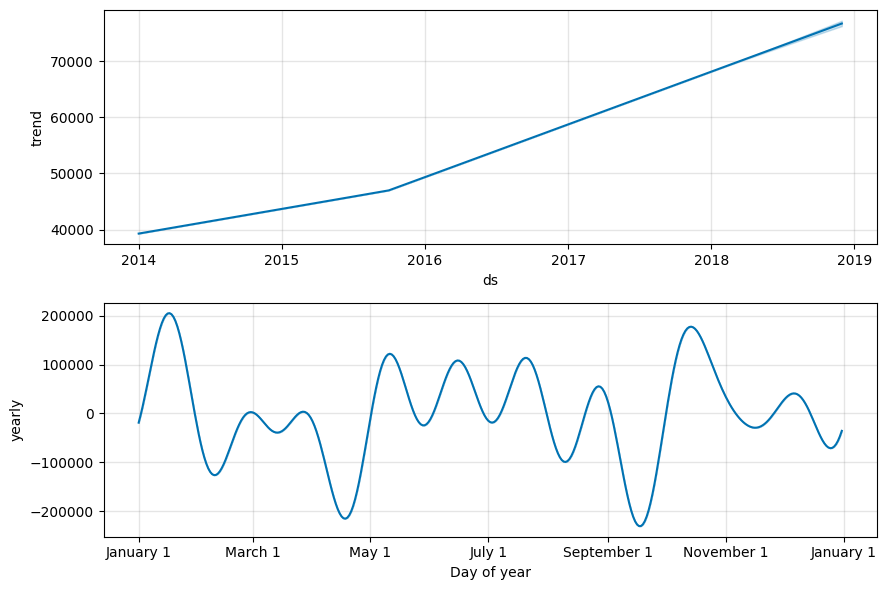

In [24]:
fig2 = model.plot_components(forecast)


In [25]:
# Add month column
monthly_sales['Month'] = monthly_sales['Order Date'].dt.month

# Mark potential holiday seasons (Nov-Dec; edit as per business knowledge)
monthly_sales['Holiday_Season'] = monthly_sales['Month'].isin([11, 12]).astype(int)
print(monthly_sales.head())


  Order Date      Sales  Month  Holiday_Season
0 2014-01-01  14236.895      1               0
1 2014-02-01   4519.892      2               0
2 2014-03-01  55691.009      3               0
3 2014-04-01  28295.345      4               0
4 2014-05-01  23648.287      5               0


In [26]:
from prophet.diagnostics import cross_validation, performance_metrics

# Cross-validate: initial=80% of data, period=1 month, horizon=6 months
cv_results = cross_validation(model, initial='1000 days', period='30 days', horizon = '180 days')
perf = performance_metrics(cv_results)
print(perf[['horizon','mae','rmse','mape']].head())


INFO:prophet:Making 9 forecasts with cutoffs between 2016-10-07 00:00:00 and 2017-06-04 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnen30tmw/msigpkd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnen30tmw/u8qcmfgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80795', 'data', 'file=/tmp/tmpnen30tmw/msigpkd0.json', 'init=/tmp/tmpnen30tmw/u8qcmfgq.json', 'output', 'file=/tmp/tmpnen30tmw/prophet_model72quc_xh/prophet_model-20251024205210.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:52:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:52:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnen30tmw/3p61iq0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnen30tmw/7387sgxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  horizon           mae          rmse      mape
0 26 days  11160.680467  12220.253792  0.219065
1 27 days   8553.601260   9693.121286  0.246886
2 55 days   9013.014980  11815.262850  0.190561
3 56 days  12681.972335  14119.362018  0.237906
4 57 days   8454.965259   9555.212719  0.248243


In [32]:
# Export files
monthly_sales.to_csv('monthly_sales.csv', index=False)
print("monthly_sales.csv created")

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('monthly_forecast.csv', index=False)
print("monthly_forecast.csv created")

# List files to confirm
import os
print(os.listdir())


monthly_sales.csv created
monthly_forecast.csv created
['.config', 'monthly_sales.csv', 'Sample - Superstore.csv', 'monthly_forecast.csv', 'archive.zip', 'sample_data']


In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Sample - Superstore.csv  


In [7]:
import pandas as pd

# Try with latin1 encoding
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

# Aggregate sales by category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_sales = category_sales.sort_values('Sales', ascending=False)

print(category_sales)

# Export for Power BI
category_sales.to_csv('category_sales.csv', index=False)


          Category        Sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320
